# Prediction of specific volume using sklearn
# a) For Pressure < 300 kPa

C:\Users\pc\AppData\Local\Temp\ipykernel_14952\3122958668.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


[[  1.   ]
 [ 10.   ]
 [ 20.   ]
 [ 30.   ]
 [ 40.   ]
 [ 50.   ]
 [ 75.   ]
 [100.   ]
 [101.325]
 [125.   ]
 [150.   ]
 [175.   ]
 [200.   ]
 [225.   ]
 [250.   ]
 [275.   ]]
[129200.    14670.     7649.8    5229.3    3993.4    3240.2    2216.9
   1693.7    1673.     1374.6    1159.     1003.34    885.44    792.97
    718.44    657.04]
Mean squared error is:   784942852.3769547
slope:   [-145.33343846]
Intercept:   27608.034714930847


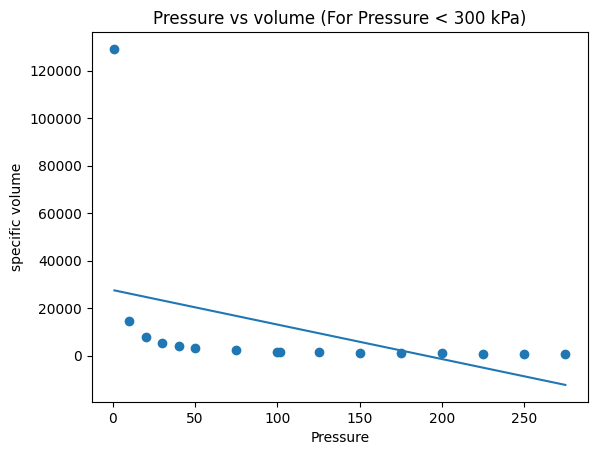

r2 score is 0.16815590648253187
value of v at 280kpa is: -12358.660862317713


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline


shv = pd.read_csv('superheated_vapor_properties.csv')

grouped = shv.groupby(shv.Property)
V_data = grouped.get_group("V")

V_data.to_csv('Specific Volume.csv')

df = pd.read_csv('Specific Volume.csv')
#print(df)

#print(df.columns.values)

XP = df['Pressure'].tolist()
#print(XP)

pressure = np.array(XP)
#print(resx)
p = pressure.reshape(-1,1)
pressure1 = p[:16]
pressureT = pressure[:16]
print(pressure1)

#c22 = pressure[18:100]
#c33 = pressure[101:]
#xlen=len(XP)
#print(c11)

YV = df['Vap_Sat'].tolist()
#print(YV)

volume = np.array(YV)
#print(resy)
volume1 = volume[:16]
print(volume1)

#ylen=len(YV)
#print(ylen)

#plt.scatter(XP,YV)
#plt.scatter(pressure1,volume1)




model = linear_model.LinearRegression()
model.fit(pressure1, volume1)
#model.fit(XP.reshape(-1,1),YV)
v_predicted = model.predict(pressure1)

print("Mean squared error is:  ", mean_squared_error(volume1, v_predicted))
print("slope:  ",  model.coef_)
print("Intercept:  ",  model.intercept_)

plt.scatter(pressure1, volume1)
plt.title('Pressure vs volume (For Pressure < 300 kPa)')
plt.xlabel('Pressure')
plt.ylabel('specific volume')
plt.plot(pressure1, v_predicted) #linear graph
plt.show()


#p=pressure.reshape(-1,1)
#print(p)


r2 = r2_score(volume1,v_predicted )
print('r2 score is', r2)
#print(v_predicted,volume1)





### For Pressure < 300 kPa,
print('value of v at 280kpa is:', np.interp(280, pressureT, v_predicted))
#np.interp(50, pressure1, v_predicted)

### For Pressure >= 300 kPa and < 1500 kPa
#print('value of v at 1375kpa is:',np.interp(1375, pressure, v_predicted))

###For Pressure >= 1500 kPa
#print('value of v at 5150kpa is:',np.interp(5150, pressure, v_predicted))











# b) For Pressure >= 300 kPa and < 1500 kPa

[[ 300.]
 [ 325.]
 [ 350.]
 [ 375.]
 [ 400.]
 [ 425.]
 [ 450.]
 [ 475.]
 [ 500.]
 [ 525.]
 [ 550.]
 [ 575.]
 [ 600.]
 [ 625.]
 [ 650.]
 [ 675.]
 [ 700.]
 [ 725.]
 [ 750.]
 [ 775.]
 [ 800.]
 [ 825.]
 [ 850.]
 [ 875.]
 [ 900.]
 [ 925.]
 [ 950.]
 [ 975.]
 [1000.]
 [1050.]
 [1100.]
 [1150.]
 [1200.]
 [1250.]
 [1300.]
 [1350.]
 [1400.]
 [1450.]]
[605.56 561.75 524.   491.13 462.22 436.61 413.75 393.22 374.68 357.84
 342.48 328.41 315.47 303.54 292.49 282.23 272.68 263.77 255.43 247.61
 240.26 233.34 226.81 220.65 214.81 209.28 204.03 199.04 194.29 185.45
 177.38 169.99 163.2  156.93 151.13 145.74 140.72 136.04]
Mean squared error is:   2420.0128505933717
slope:   [-0.35253625]
Intercept:   565.9289736090213


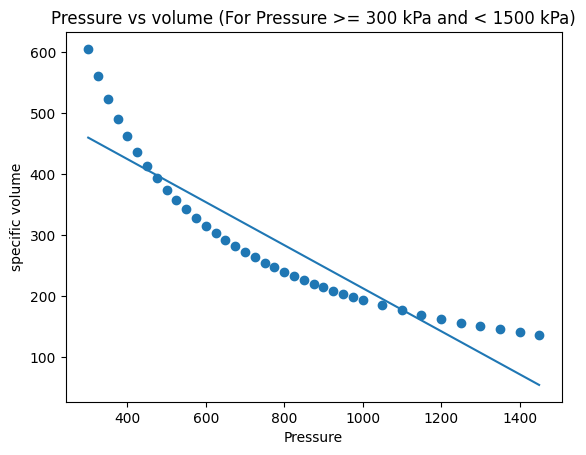

r2 score is 0.8402322107077735
value of v at 1375kpa is: 81.19163569967384


In [2]:
#16 to 54
XP = df['Pressure'].tolist()
#print(XP)

pressure = np.array(XP)
#print(resx)
p = pressure.reshape(-1,1)
pressure2 = p[16:54]
pressureT2 = pressure[16:54]
print(pressure2)

#c22 = pressure[18:100]
#c33 = pressure[101:]
#xlen=len(XP)
#print(c11)

YV = df['Vap_Sat'].tolist()
#print(YV)

volume = np.array(YV)
#print(resy)
volume2 = volume[16:54]
print(volume2)

#ylen=len(YV)
#print(ylen)

#plt.scatter(XP,YV)
#plt.scatter(pressure1,volume1)




model = linear_model.LinearRegression()
model.fit(pressure2, volume2)
#model.fit(XP.reshape(-1,1),YV)
v_predicted2 = model.predict(pressure2)

print("Mean squared error is:  ", mean_squared_error(volume2, v_predicted2))
print("slope:  ",  model.coef_)
print("Intercept:  ",  model.intercept_)

plt.scatter(pressure2, volume2)
plt.title('Pressure vs volume (For Pressure >= 300 kPa and < 1500 kPa)')
plt.xlabel('Pressure')
plt.ylabel('specific volume')
plt.plot(pressure2, v_predicted2) #linear graph
plt.show()


#p=pressure.reshape(-1,1)
#print(p)


r2 = r2_score(volume2,v_predicted2 )
print('r2 score is', r2)
#print(v_predicted,volume1)





### For Pressure < 300 kPa,
#print('value of v at 275kpa is:', np.interp(280, pressureT, v_predicted))
#np.interp(50, pressure1, v_predicted)

### For Pressure >= 300 kPa and < 1500 kPa
print('value of v at 1375kpa is:',np.interp(1375, pressureT2, v_predicted2))

###For Pressure >= 1500 kPa
#print('value of v at 5150kpa is:',np.interp(5150, pressure, v_predicted))




# c) For Pressure >= 1500 kPa


[[ 1500.]
 [ 1550.]
 [ 1600.]
 [ 1650.]
 [ 1700.]
 [ 1750.]
 [ 1800.]
 [ 1850.]
 [ 1900.]
 [ 1950.]
 [ 2000.]
 [ 2100.]
 [ 2200.]
 [ 2300.]
 [ 2400.]
 [ 2500.]
 [ 2600.]
 [ 2700.]
 [ 2800.]
 [ 2900.]
 [ 3000.]
 [ 3100.]
 [ 3200.]
 [ 3300.]
 [ 3400.]
 [ 3500.]
 [ 3600.]
 [ 3700.]
 [ 3800.]
 [ 3900.]
 [ 4000.]
 [ 4100.]
 [ 4200.]
 [ 4300.]
 [ 4400.]
 [ 4500.]
 [ 4600.]
 [ 4700.]
 [ 4800.]
 [ 4900.]
 [ 5000.]
 [ 5100.]
 [ 5200.]
 [ 5300.]
 [ 5400.]
 [ 5500.]
 [ 5600.]
 [ 5700.]
 [ 5800.]
 [ 5900.]
 [ 6000.]
 [ 6100.]
 [ 6200.]
 [ 6300.]
 [ 6400.]
 [ 6500.]
 [ 6600.]
 [ 6700.]
 [ 6800.]
 [ 7000.]
 [ 7200.]
 [ 7400.]
 [ 7600.]
 [ 7800.]
 [ 8000.]
 [ 8200.]
 [ 8400.]
 [ 8600.]
 [ 8800.]
 [ 9000.]
 [ 9200.]
 [ 9400.]
 [ 9600.]
 [ 9800.]
 [10000.]
 [10200.]
 [10400.]
 [10600.]
 [10800.]
 [11000.]
 [11200.]
 [11400.]]
[131.66  127.55  123.69  120.05  116.62  113.38  110.32  107.41  104.65
 102.031  99.536  94.89   90.652  86.769  83.199  79.905  76.856  74.025
  71.389  68.928  66.626  64.467  

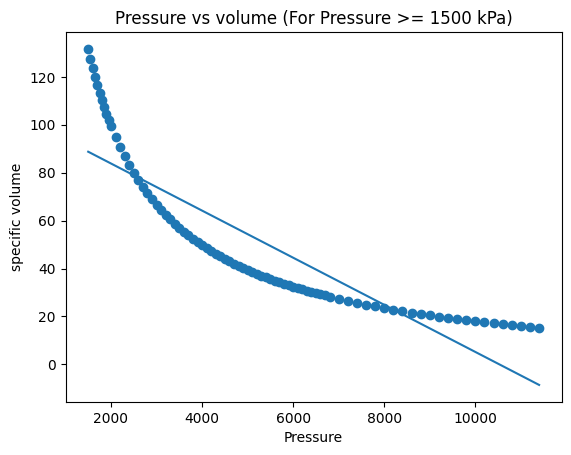

r2 score is 0.7640960509847484
value of v at 5150kpa is: 52.86630309067234


In [3]:
# 54 to 136 
XP = df['Pressure'].tolist()
#print(XP)

pressure = np.array(XP)
#print(resx)
p = pressure.reshape(-1,1)
pressure3 = p[54:136]
pressureT3 = pressure[54:136]
print(pressure3)

#c22 = pressure[18:100]
#c33 = pressure[101:]
#xlen=len(XP)
#print(c11)

YV = df['Vap_Sat'].tolist()
#print(YV)

volume = np.array(YV)
#print(resy)
volume3 = volume[54:136]
print(volume3)

#ylen=len(YV)
#print(ylen)

#plt.scatter(XP,YV)
#plt.scatter(pressure1,volume1)




model = linear_model.LinearRegression()
model.fit(pressure3, volume3)
#model.fit(XP.reshape(-1,1),YV)
v_predicted3 = model.predict(pressure3)

print("Mean squared error is:  ", mean_squared_error(volume3, v_predicted3))
print("slope:  ",  model.coef_)
print("Intercept:  ",  model.intercept_)

plt.scatter(pressure3, volume3)
plt.title('Pressure vs volume (For Pressure >= 1500 kPa)')
plt.xlabel('Pressure')
plt.ylabel('specific volume')
plt.plot(pressure3, v_predicted3) #linear graph
plt.show()


#p=pressure.reshape(-1,1)
#print(p)


r2 = r2_score(volume3,v_predicted3 )
print('r2 score is', r2)
#print(v_predicted,volume1)





### For Pressure < 300 kPa,
#print('value of v at 275kpa is:', np.interp(280, pressureT, v_predicted))
#np.interp(50, pressure1, v_predicted)

### For Pressure >= 300 kPa and < 1500 kPa
#print('value of v at 1375kpa is:',np.interp(1375, pressureT2, v_predicted2))

###For Pressure >= 1500 kPa
print('value of v at 5150kpa is:',np.interp(5150, pressureT3, v_predicted3))



# Prediction of specific volume from scratch

# a)For Pressure < 300 kPa

In [4]:
#new

no of iterations: 0


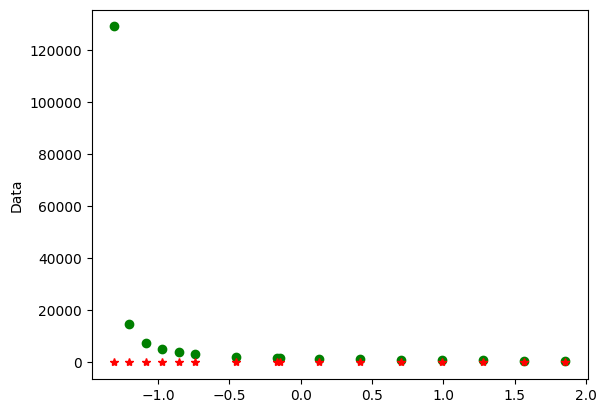

no of iterations: 5000


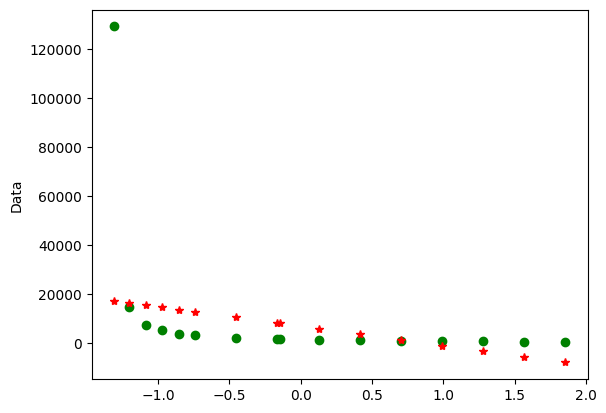

no of iterations: 10000


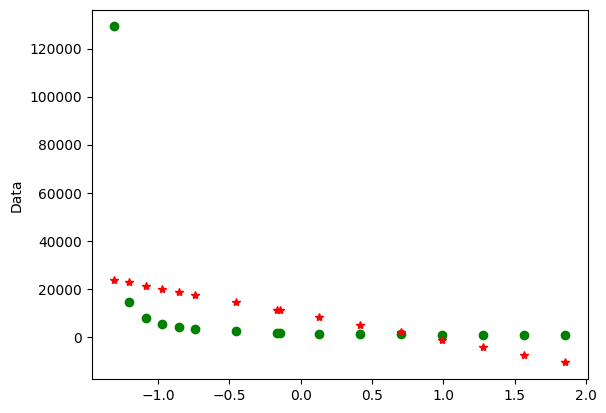

no of iterations: 15000


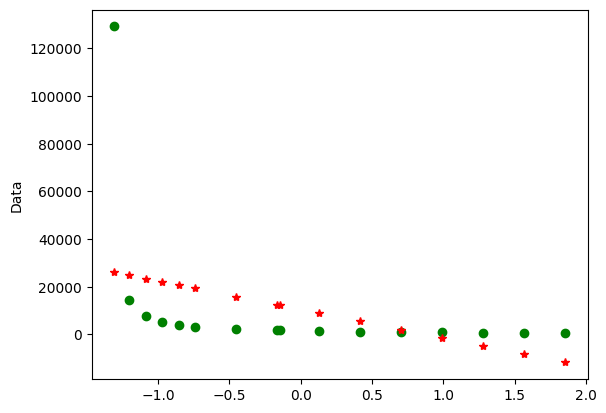

no of iterations: 20000


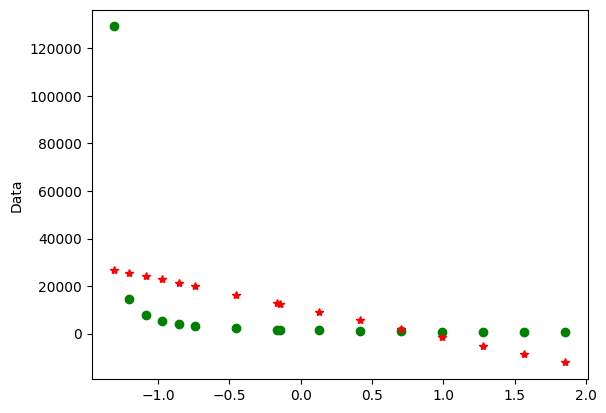

no of iterations: 25000


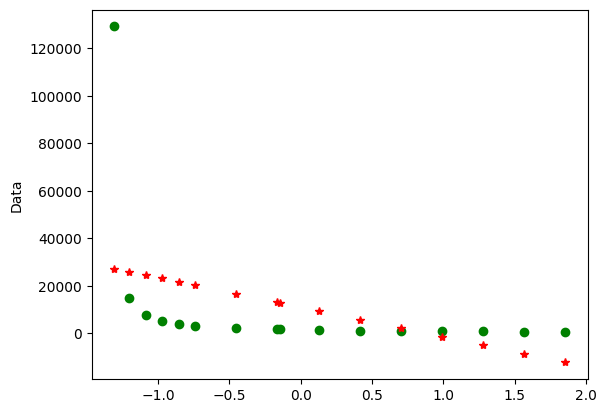

no of iterations: 30000


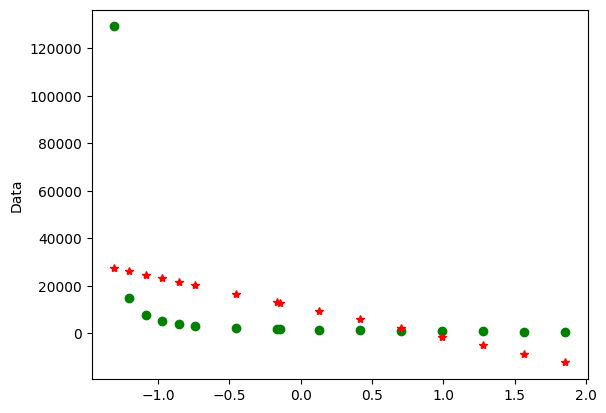

no of iterations: 35000


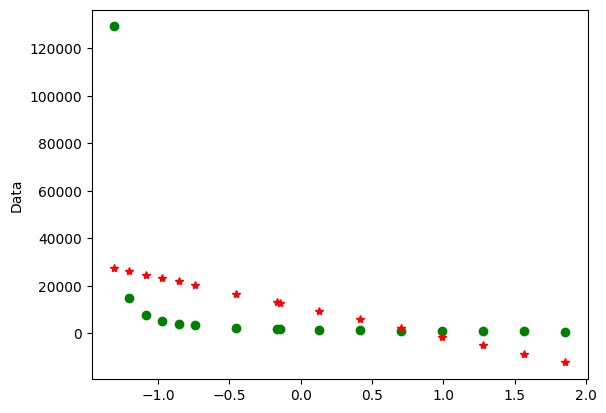

no of iterations: 40000


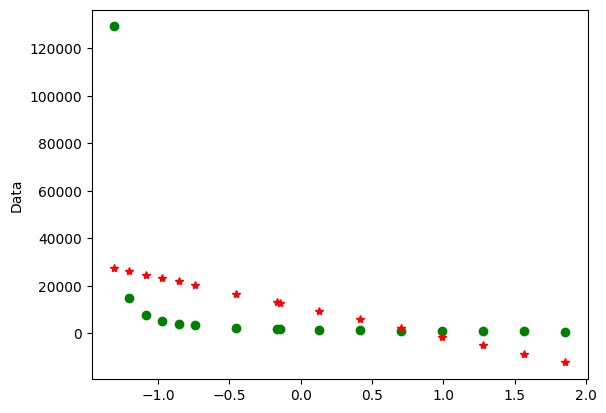

no of iterations: 45000


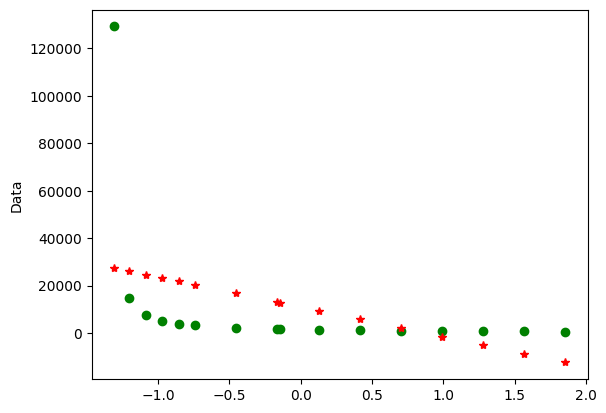

no of iterations: 50000


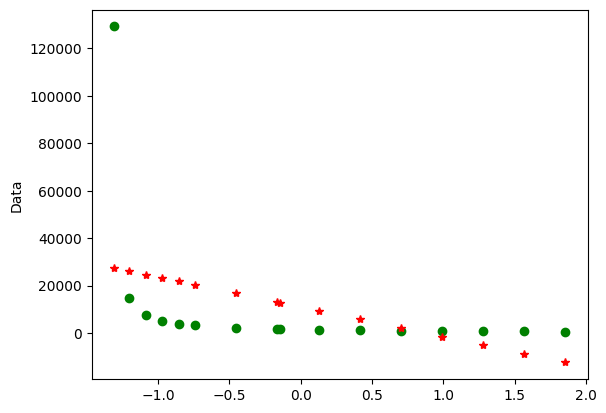

no of iterations: 55000


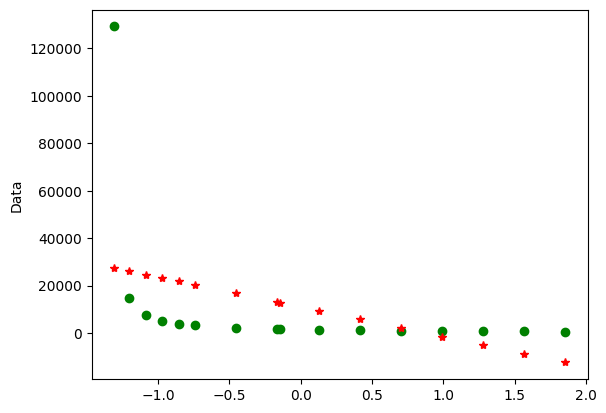

no of iterations: 60000


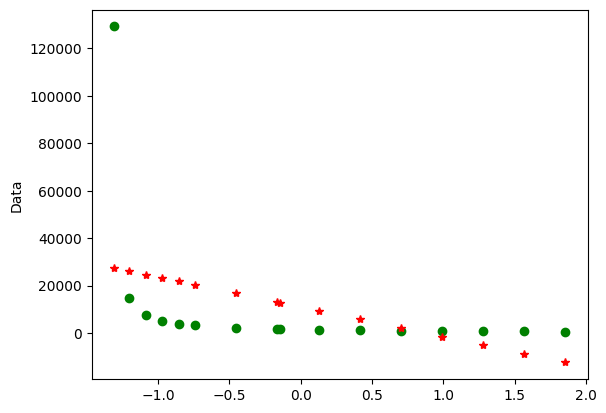

no of iterations: 65000


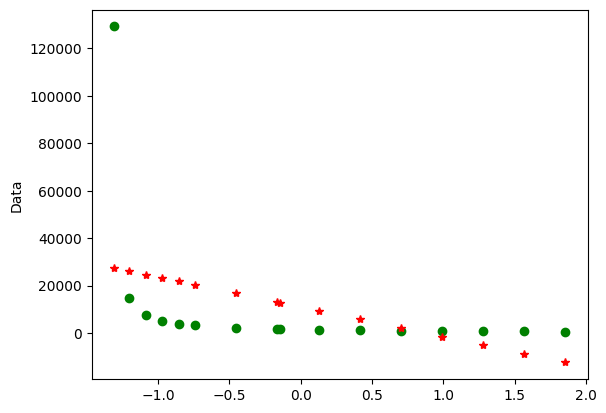

no of iterations: 70000


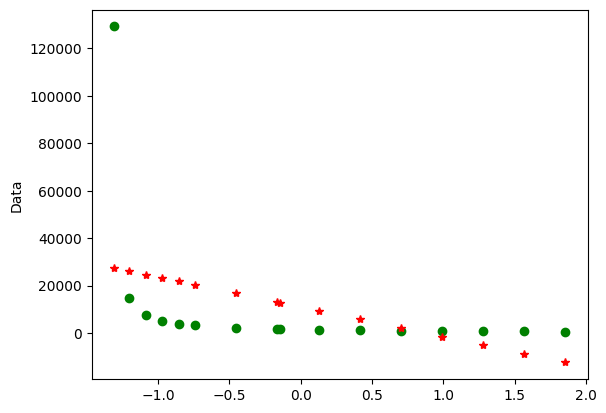

no of iterations: 75000


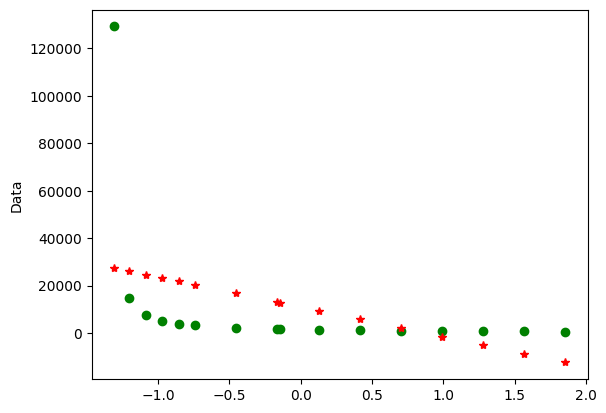

no of iterations: 80000


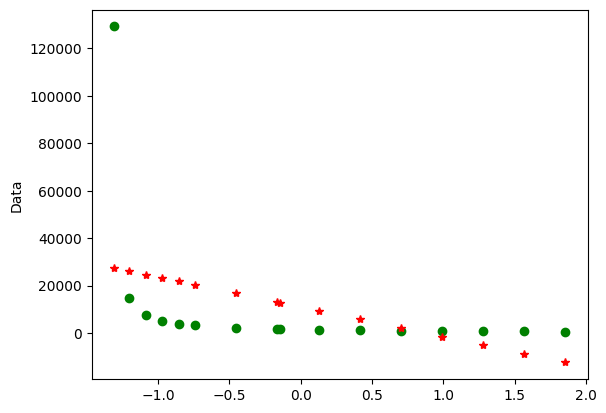

no of iterations: 85000


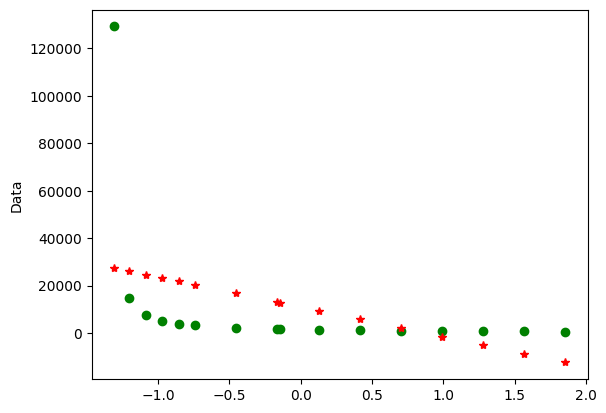

no of iterations: 90000


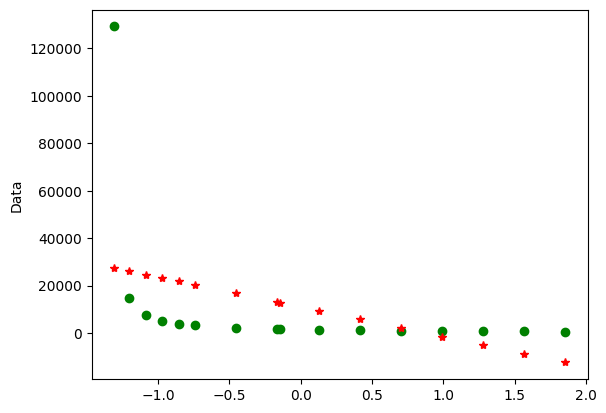

no of iterations: 95000


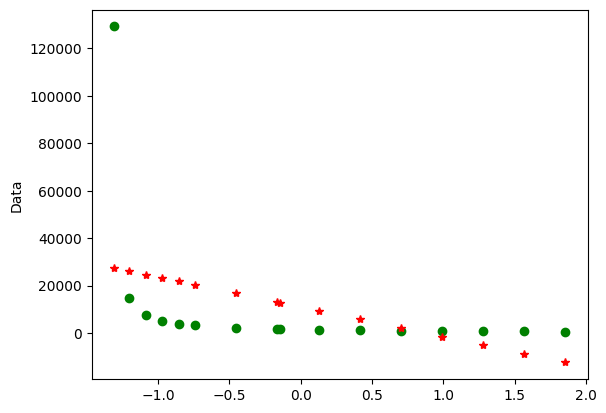

Final slope (m): [-12596.62246687]
Final intercept (c): [11009.82060235]
R² score for the custom linear regression model: 0.16815590648253176


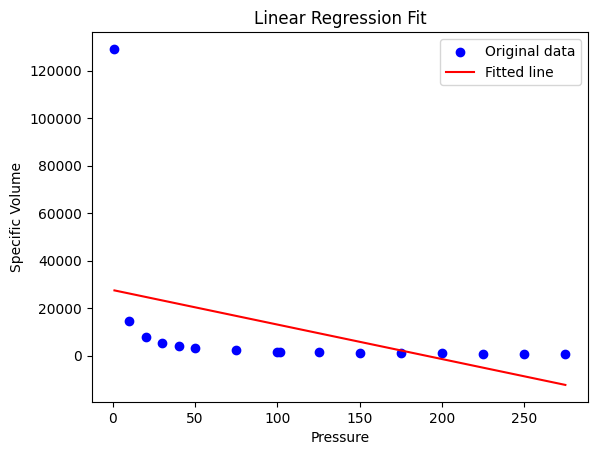

In [5]:
XP = df['Pressure'].tolist()
pressure = np.array(XP)
p = pressure.reshape(-1,1)
pressure1 = p[:16]
pressureT = pressure[:16]

YV = df['Vap_Sat'].tolist()
volume = np.array(YV)
volume1 = volume[:16]

x = pressure1.flatten()  # Flatten to make it 1D
y = volume1

# Normalize x
x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

def loss(y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

def forward_pass(x, m, c):
    return m * x + c

# Increased Initialization and Learning Rate
m1 = np.random.randn(1) * 0.01
c1 = np.random.randn(1) * 0.01
learningrate = 0.0001  # Increased learning rate
numiter = 100000  # More iterations
N = x_normalized.shape[0]

L = []

for i in range(numiter):
    y_hat = forward_pass(x_normalized, m1, c1)
    
    dm = (2.0 / N) * -np.sum(np.multiply(x_normalized, (y - y_hat)))
    dc = (2.0 / N) * -np.sum(y - y_hat)
    
    m1 = m1 - learningrate * dm
    c1 = c1 - learningrate * dc
    
    if i % 5000 == 0:
        L.append(loss(y_hat, y))
        print("no of iterations:", i)
        plt.plot(x_normalized, y, 'go')
        plt.plot(x_normalized, y_hat, 'r*')
        plt.ylabel('Data')
        plt.show()

print(f"Final slope (m): {m1}")
print(f"Final intercept (c): {c1}")

# Convert slope and intercept back to original scale
m1_original_scale = m1 / x_std
c1_original_scale = c1 - m1 * x_mean / x_std

# Calculate R² score for your custom model
y_predicted = forward_pass(x, m1_original_scale, c1_original_scale)

ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - y_predicted) ** 2)
r2_score_custom = 1 - (ss_residual / ss_total)

print(f"R² score for the custom linear regression model: {r2_score_custom}")

# Visualize the final fit
plt.scatter(x, y, color='blue', label='Original data')
plt.plot(x, y_predicted, color='red', label='Fitted line')
plt.xlabel('Pressure')
plt.ylabel('Specific Volume')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


# b) For Pressure >= 300 kPa and < 1500 kPa


no of iterations: 0


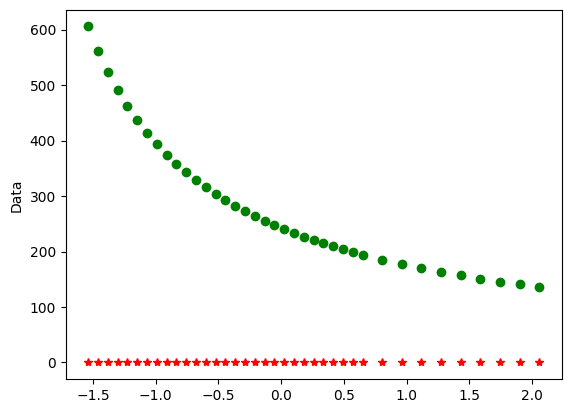

no of iterations: 5000


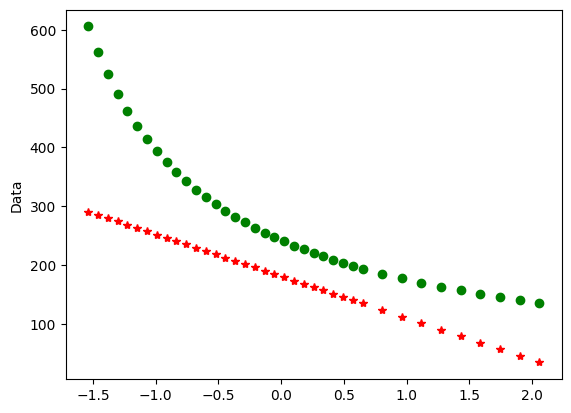

no of iterations: 10000


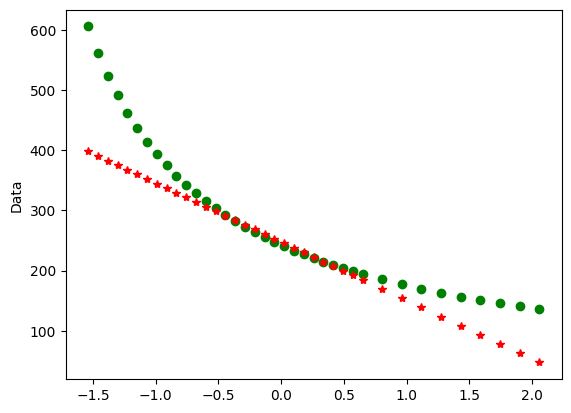

no of iterations: 15000


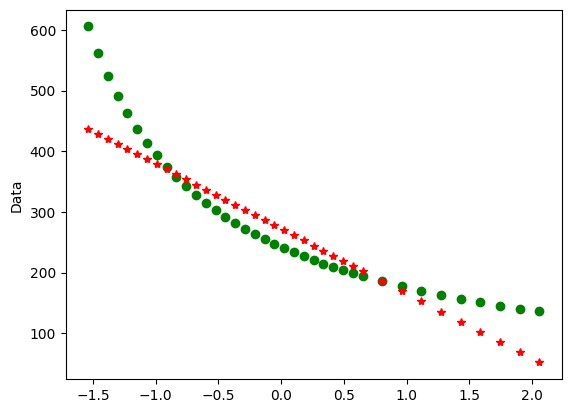

no of iterations: 20000


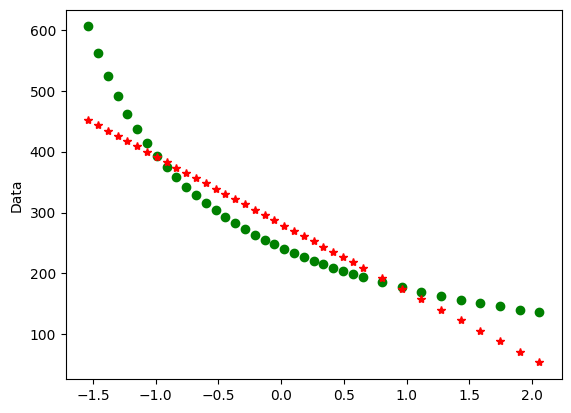

no of iterations: 25000


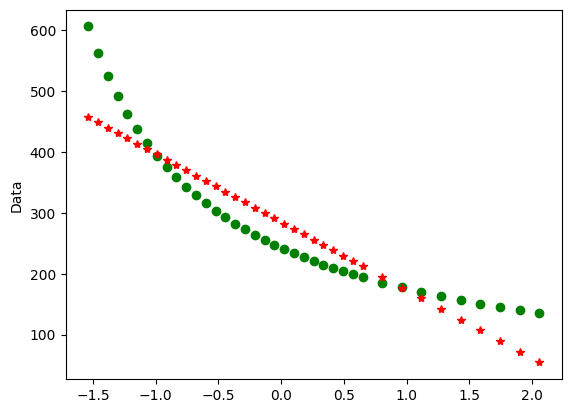

no of iterations: 30000


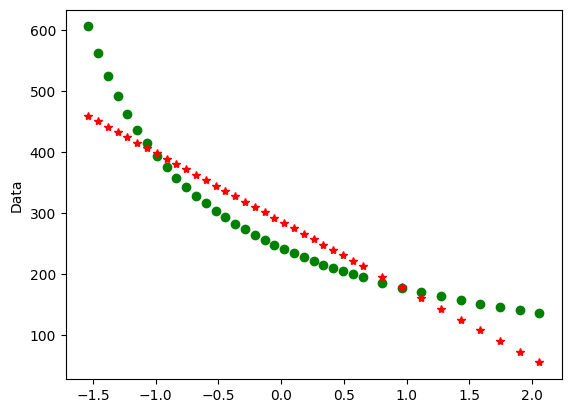

no of iterations: 35000


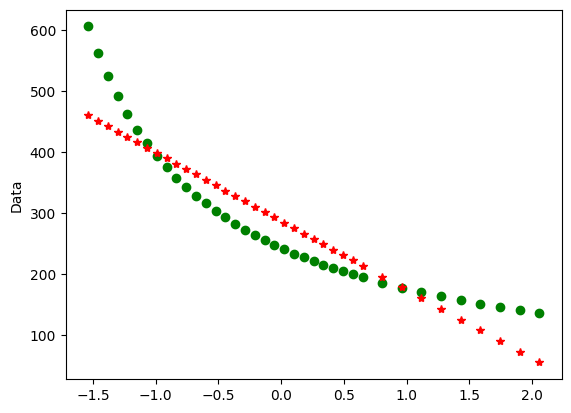

no of iterations: 40000


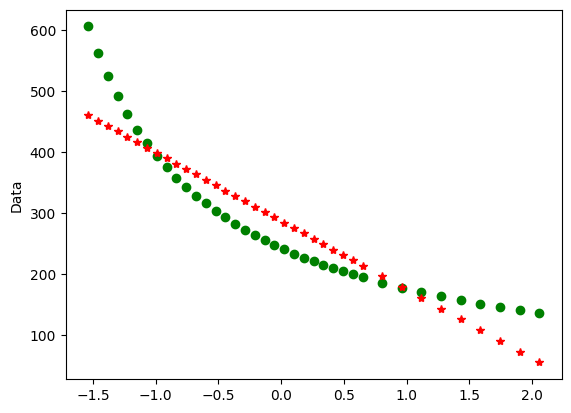

no of iterations: 45000


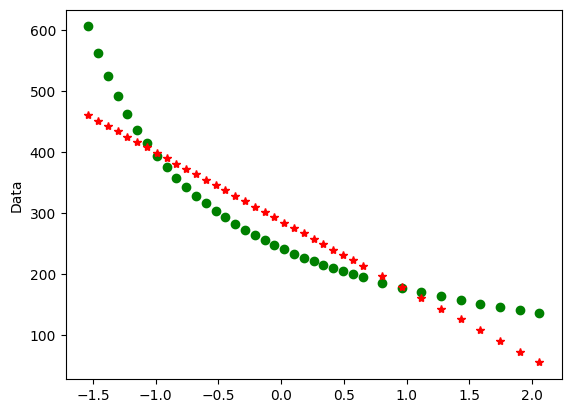

no of iterations: 50000


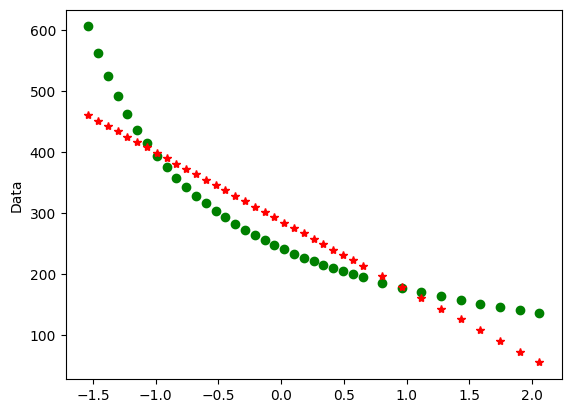

no of iterations: 55000


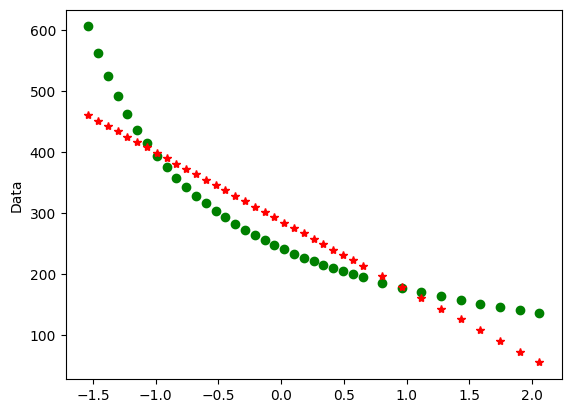

no of iterations: 60000


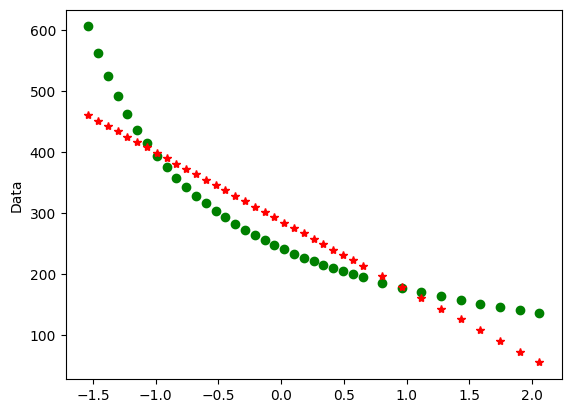

no of iterations: 65000


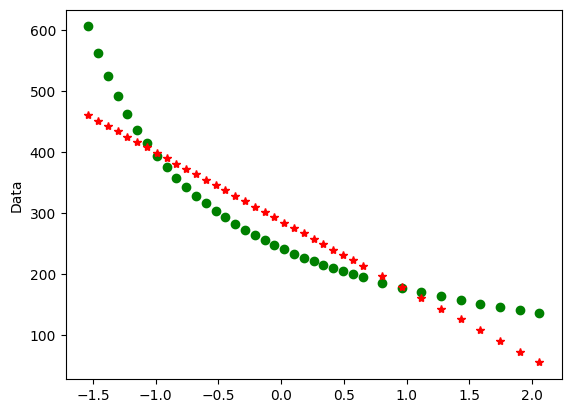

no of iterations: 70000


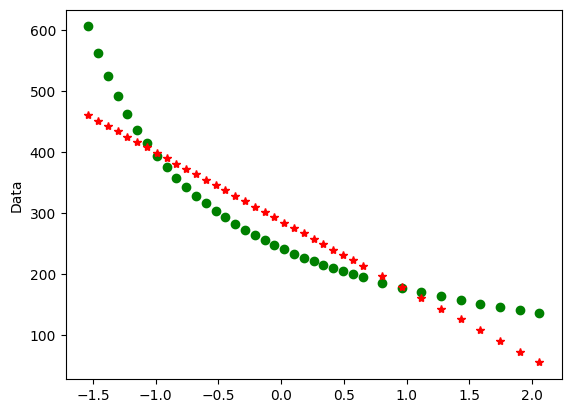

no of iterations: 75000


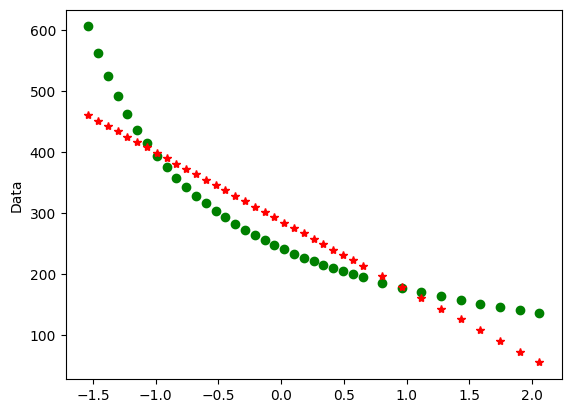

no of iterations: 80000


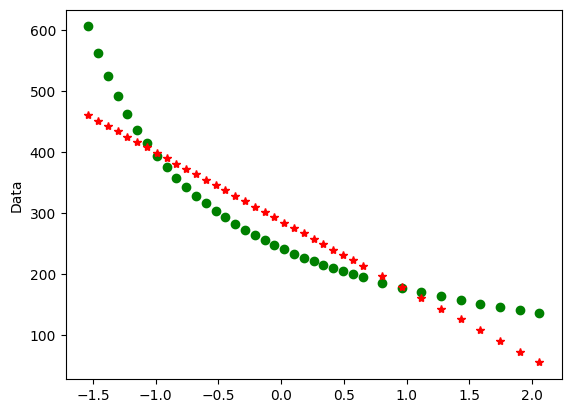

no of iterations: 85000


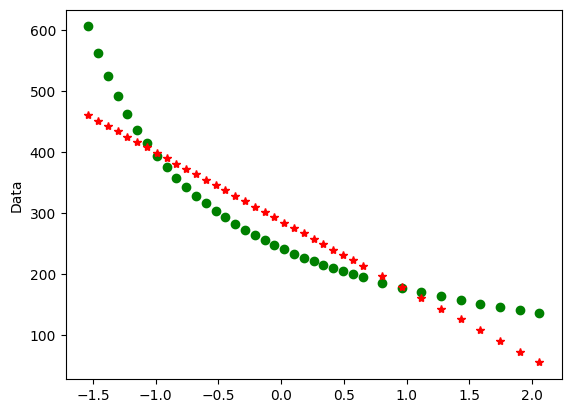

no of iterations: 90000


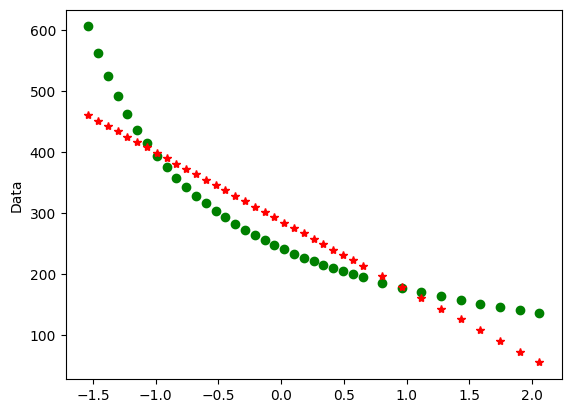

no of iterations: 95000


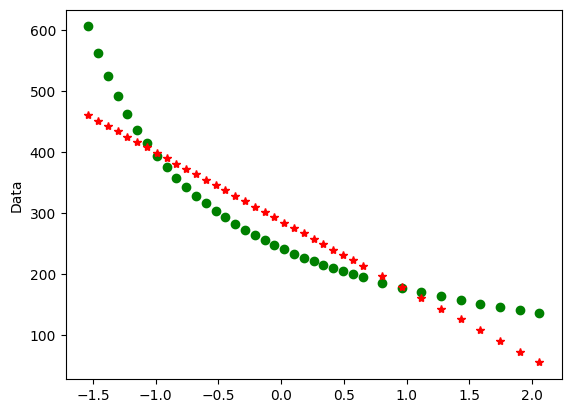

Final slope (m): [-112.8142305]
Final intercept (c): [286.68315731]
R² score for the custom linear regression model: 0.8402322107077735


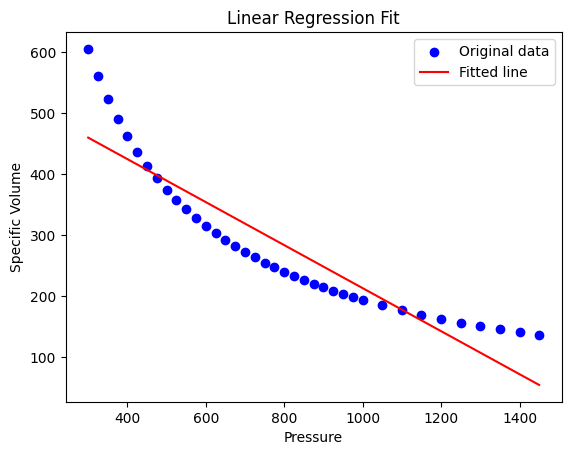

In [6]:
XP = df['Pressure'].tolist()
pressure = np.array(XP)
p = pressure.reshape(-1,1)
pressure2 = p[16:54]
pressureT2 = pressure[16:54]

YV = df['Vap_Sat'].tolist()
volume = np.array(YV)
volume2 = volume[16:54]

x = pressure2.flatten()  # Flatten to make it 1D
y = volume2

# Normalize x
x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

def loss(y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

def forward_pass(x, m, c):
    return m * x + c

# Increased Initialization and Learning Rate
m1 = np.random.randn(1) * 0.01
c1 = np.random.randn(1) * 0.01
learningrate = 0.0001  # Increased learning rate
numiter = 100000  # More iterations
N = x_normalized.shape[0]

L = []

for i in range(numiter):
    y_hat = forward_pass(x_normalized, m1, c1)
    
    dm = (2.0 / N) * -np.sum(np.multiply(x_normalized, (y - y_hat)))
    dc = (2.0 / N) * -np.sum(y - y_hat)
    
    m1 = m1 - learningrate * dm
    c1 = c1 - learningrate * dc
    
    if i % 5000 == 0:
        L.append(loss(y_hat, y))
        print("no of iterations:", i)
        plt.plot(x_normalized, y, 'go')
        plt.plot(x_normalized, y_hat, 'r*')
        plt.ylabel('Data')
        plt.show()

print(f"Final slope (m): {m1}")
print(f"Final intercept (c): {c1}")

# Convert slope and intercept back to original scale
m1_original_scale = m1 / x_std
c1_original_scale = c1 - m1 * x_mean / x_std

# Calculate R² score for your custom model
y_predicted = forward_pass(x, m1_original_scale, c1_original_scale)

ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - y_predicted) ** 2)
r2_score_custom = 1 - (ss_residual / ss_total)

print(f"R² score for the custom linear regression model: {r2_score_custom}")

# Visualize the final fit
plt.scatter(x, y, color='blue', label='Original data')
plt.plot(x, y_predicted, color='red', label='Fitted line')
plt.xlabel('Pressure')
plt.ylabel('Specific Volume')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


# c) For Pressure >= 1500 kPa


In [7]:
#new

no of iterations: 0


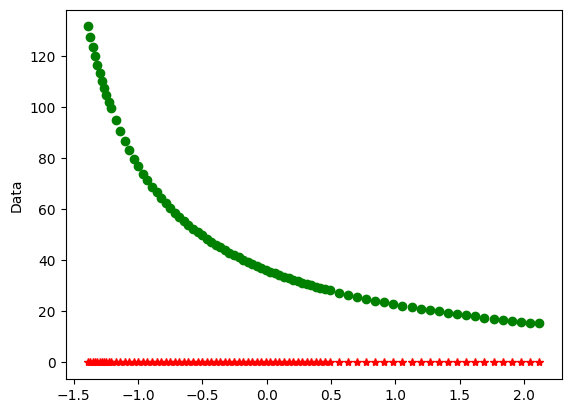

no of iterations: 5000


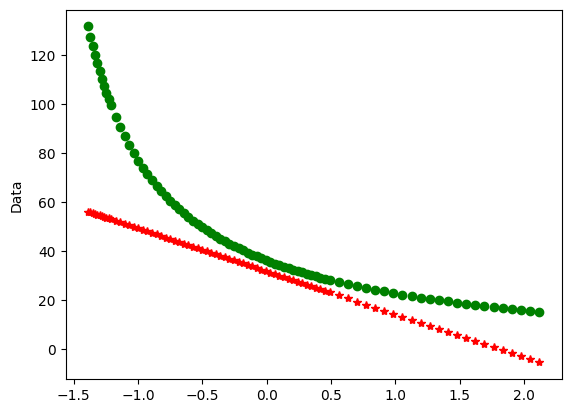

no of iterations: 10000


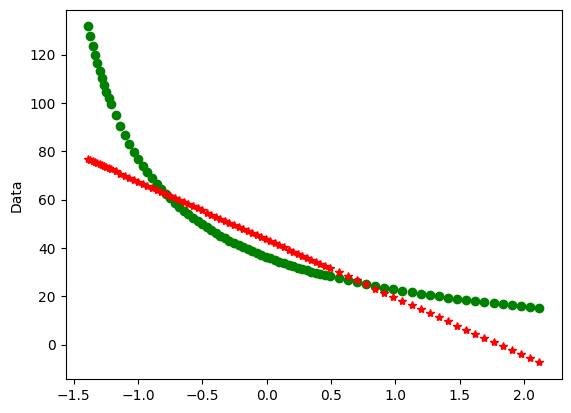

no of iterations: 15000


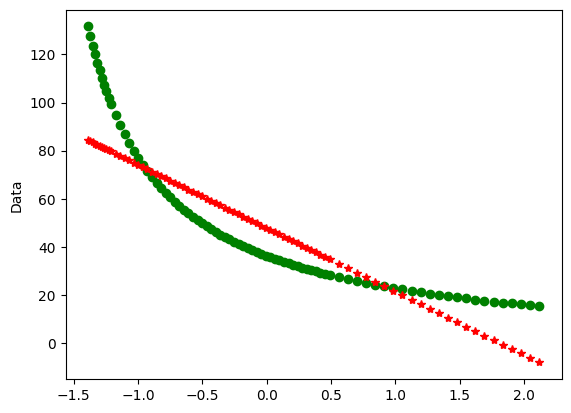

no of iterations: 20000


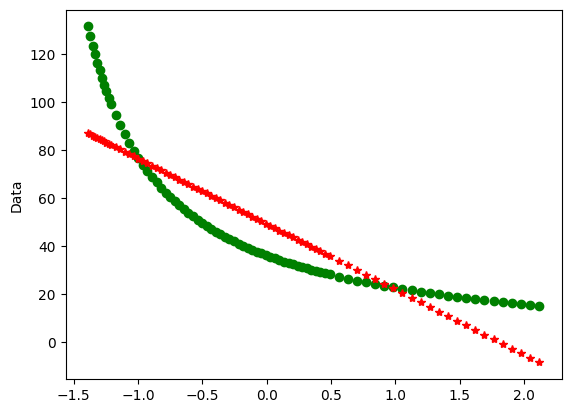

no of iterations: 25000


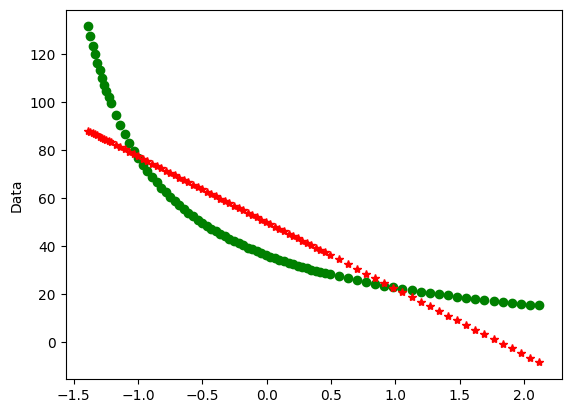

no of iterations: 30000


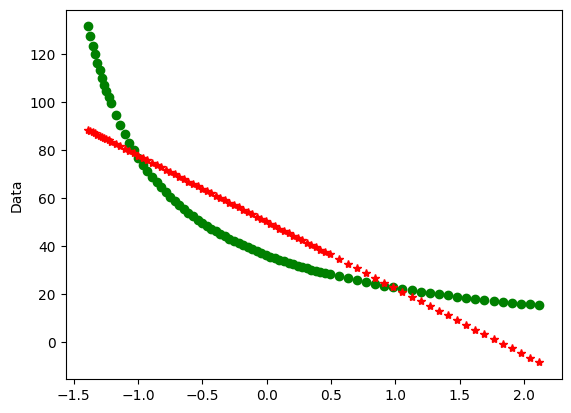

no of iterations: 35000


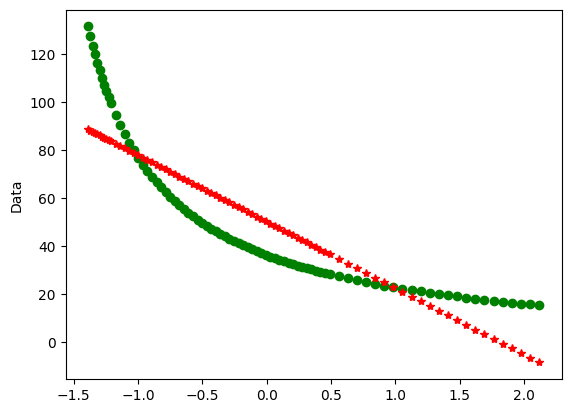

no of iterations: 40000


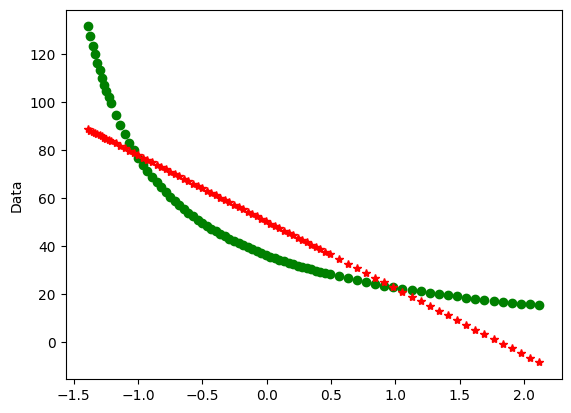

no of iterations: 45000


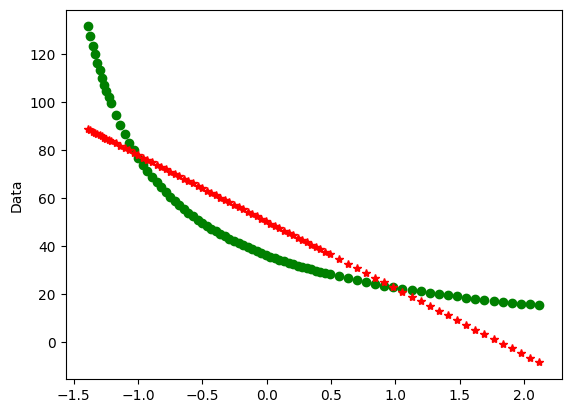

no of iterations: 50000


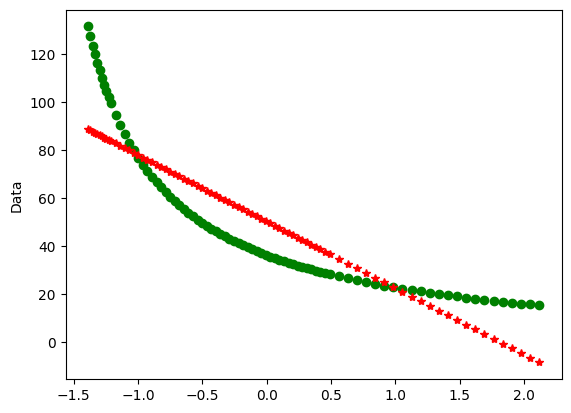

no of iterations: 55000


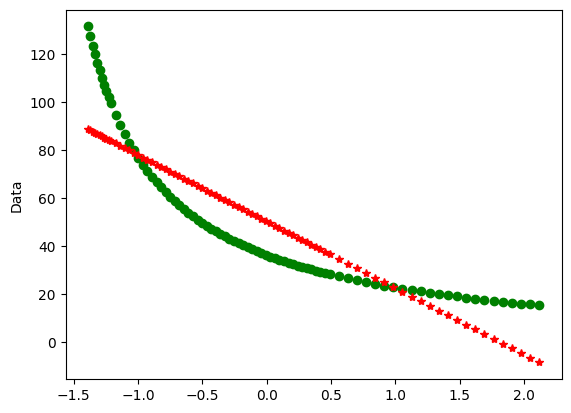

no of iterations: 60000


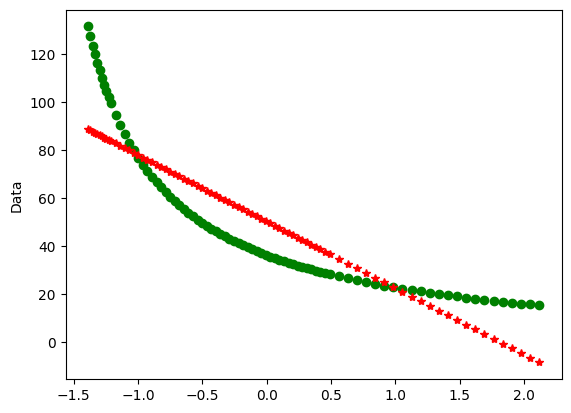

no of iterations: 65000


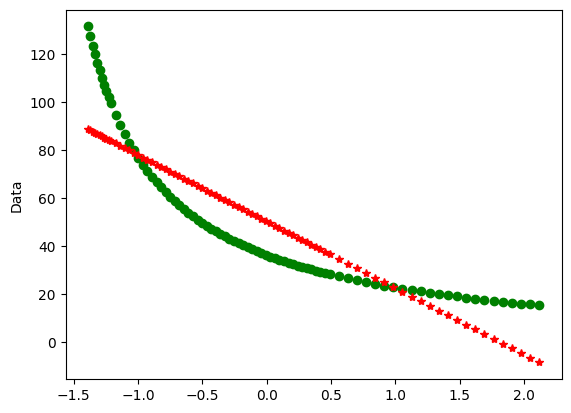

no of iterations: 70000


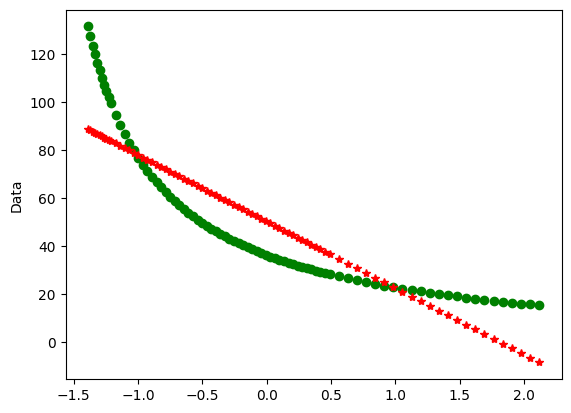

no of iterations: 75000


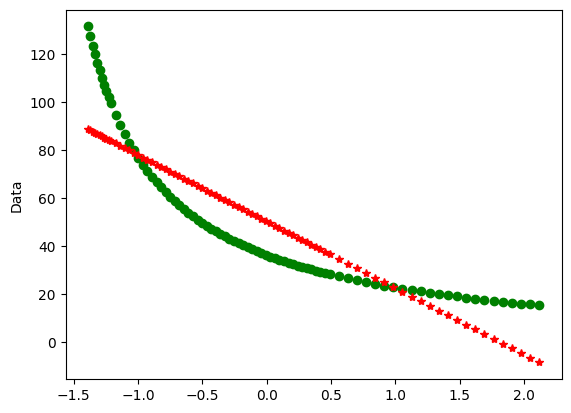

no of iterations: 80000


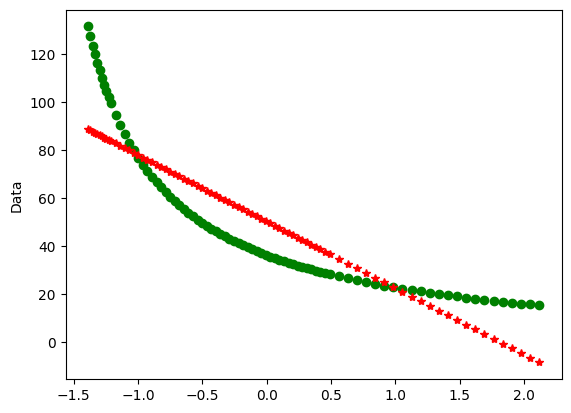

no of iterations: 85000


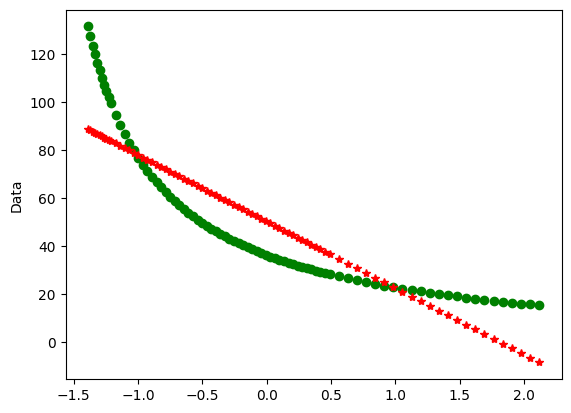

no of iterations: 90000


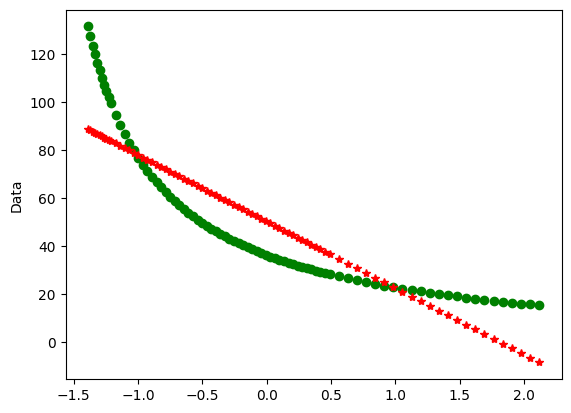

no of iterations: 95000


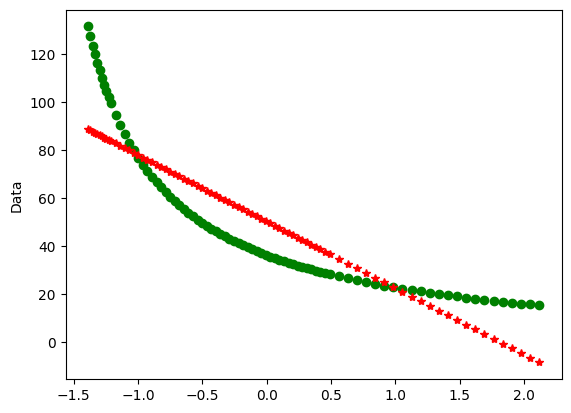

Final slope (m): [-27.78606316]
Final intercept (c): [50.21029258]
R² score for the custom linear regression model: 0.7640960509847484


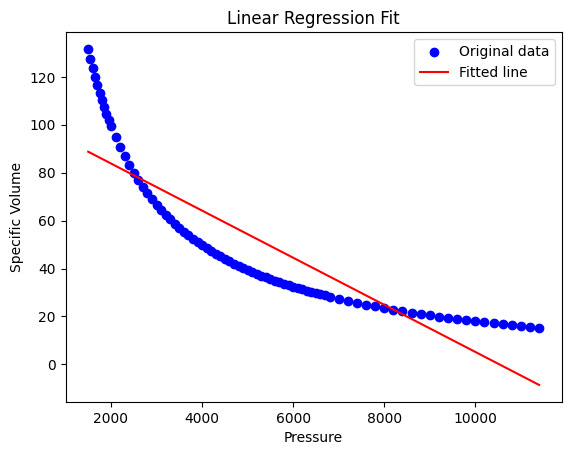

In [8]:
XP = df['Pressure'].tolist()
pressure = np.array(XP)
p = pressure.reshape(-1,1)
pressure3 = p[54:136]
pressureT3 = pressure[54:136]

YV = df['Vap_Sat'].tolist()
volume = np.array(YV)
volume3 = volume[54:136]

x = pressure3.flatten()  # Flatten to make it 1D
y = volume3

# Normalize x
x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

def loss(y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

def forward_pass(x, m, c):
    return m * x + c

# Increased Initialization and Learning Rate
m1 = np.random.randn(1) * 0.01
c1 = np.random.randn(1) * 0.01
learningrate = 0.0001  # Increased learning rate
numiter = 100000  # More iterations
N = x_normalized.shape[0]

L = []

for i in range(numiter):
    y_hat = forward_pass(x_normalized, m1, c1)
    
    dm = (2.0 / N) * -np.sum(np.multiply(x_normalized, (y - y_hat)))
    dc = (2.0 / N) * -np.sum(y - y_hat)
    
    m1 = m1 - learningrate * dm
    c1 = c1 - learningrate * dc
    
    if i % 5000 == 0:
        L.append(loss(y_hat, y))
        print("no of iterations:", i)
        plt.plot(x_normalized, y, 'go')
        plt.plot(x_normalized, y_hat, 'r*')
        plt.ylabel('Data')
        plt.show()

print(f"Final slope (m): {m1}")
print(f"Final intercept (c): {c1}")

# Convert slope and intercept back to original scale
m1_original_scale = m1 / x_std
c1_original_scale = c1 - m1 * x_mean / x_std

# Calculate R² score for your custom model
y_predicted = forward_pass(x, m1_original_scale, c1_original_scale)

ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - y_predicted) ** 2)
r2_score_custom = 1 - (ss_residual / ss_total)

print(f"R² score for the custom linear regression model: {r2_score_custom}")

# Visualize the final fit
plt.scatter(x, y, color='blue', label='Original data')
plt.plot(x, y_predicted, color='red', label='Fitted line')
plt.xlabel('Pressure')
plt.ylabel('Specific Volume')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()
